In [101]:
import matplotlib.pyplot as plt
from nltk.corpus import words
from collections import defaultdict,Counter,OrderedDict
from itertools import combinations
import networkx as nx


word_list = words.words()
words4=[w for w in word_list if len(w)==4]

In [137]:
class Graph:
    def __init__(self):
        self.nodes={}
    
    def add_node(self, node):
        if node is None: return
        if node not in self.nodes:
            self.nodes[node]={}
        
    def add_edge(self,node1, node2, weight=1):
        if node1 is None or node2 is None: return
        
        self.add_node(node1)
        self.add_node(node2)
        
        if node2 not in self.nodes[node1]:
            self.nodes[node1][node2]=weight

        if node1 not in self.nodes[node2]:
            self.nodes[node2][node1]=weight
    
    def get_neighbors(self,node):
        return self.nodes[node]
    
    def get_nodes(self):
        return self.nodes.keys()
    
    
            


def build_word_buckets(words):
    """
    For every word in the words 
    adds it  into 4 different word buckets,
    lebelled with labels with one letter missing.
    For example "pool" goes into "_ool","p_ol","po_l" and "poo_" buckets.
    Doing so we gather together  all the words
    that  require just one modification to convert them to
    each other. Words in 4 buckets will create edges of a graph 
    for word transformation.
    
    Parameters
    ----------
    - words: list of words of 4 letters each.
    
    Returns
    -------
    Dictionary of 4 buckets for each word in the input list of words.
    
    
    """
    buckets=defaultdict(list)
    s=set(words)
    for word in s:
        for i in range(4):
            w= word#.lower()
            label=w[:i]+"_"+w[i+1:]
            buckets[label].append(w)
        
    return buckets
    
    
def build_graph(words):
    """
    Returns a nx graph created from list of words.
    
    Parameters
    ----------
    - words: list of words of 4 letters each.
        
    """
    
    bs=build_word_buckets(words)
    g=nx.Graph()
    
#     for label, w_list in bs.items():
    for w_list in bs.values():
        g.add_nodes_from(w_list)
        g.add_edges_from(combinations(w_list,2))
    
    
    return g
    
    
g=build_graph(words4) 
print(nx.info(g))
nl=list(g.nodes)[:2]


# nx.draw_networkx_nodes(g, pos=nx.spring_layout(g),nodelist=nl)
# plt.draw()
# print(list(g.neighbors('kobu')))
# print(list(g['kobu']))



def bfs(graph, start_key, target_key):
    tree=nx.Graph() ### addition
    
    visited=set()

    #to_visit=[start_key]
    to_visit=OrderedDict.fromkeys([start_key])
#     to_visit[start_key]=1
    
    while len(to_visit)>0:
        k=to_visit.popitem(last=False)[0]
        #k=to_visit.pop(0)
        visited.add(k)
        tree.add_node(k) ### addition
        
        # prosess the key 
        if k == target_key:
            return k,tree  ### addition
        
        
        children=graph[k]
        for c in children:
            if c not in visited and c not in to_visit:
                graph.nodes[c]['parent']=k
                #to_visit.append(c)
                to_visit[c]=1
                tree.add_node(c) ### addition
                tree.add_edge(k,c) ### addition
#         print(visited)
#         print(to_visit.keys())
                

                
def get_path(G, key):
    if key is None: return

    path=[key]
    k=key
    parent=G.nodes[k].get('parent',None)
    while parent != None:
        path.append(parent)
        k=parent
        parent=G.nodes[k].get('parent',None)
    return path
    

Name: 
Type: Graph
Number of nodes: 5273
Number of edges: 27730
Average degree:  10.5177


[]
['tool', 'fool']


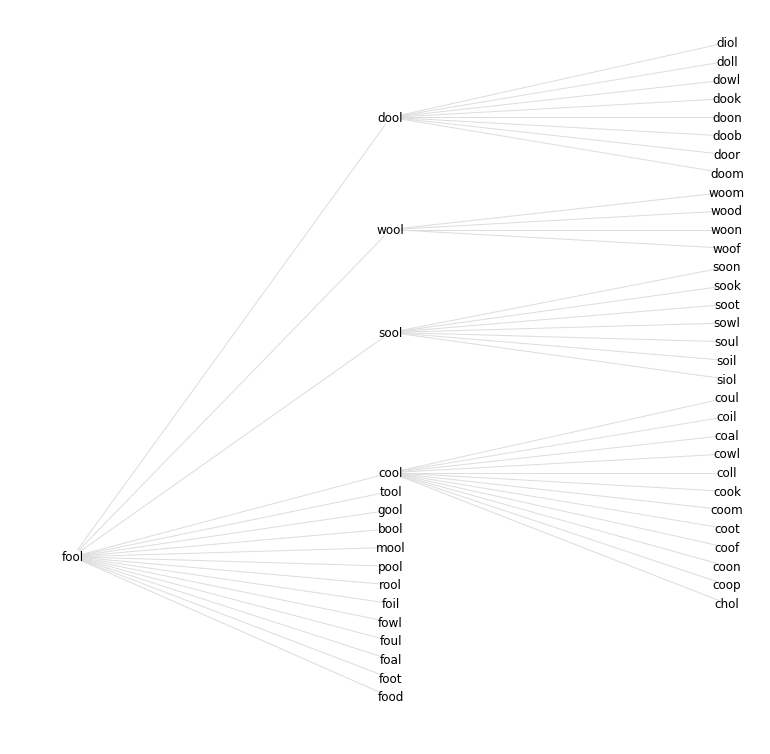

In [161]:
from networkx.drawing.nx_agraph import write_dot, graphviz_layout


# remove  'parent' attr
for k in g.nodes: g.nodes[k].pop('parent',None)

# check there is no attrs
nodes=[(n,d) for n,d in g.nodes(data=True) if len(d)>0];
print(nodes)

print('==========')
# kk=bfs(g,'fool','wool')
kk,tree=bfs(g,'fool','tool')

# if kk: print(g.nodes[kk])
print(get_path(g,kk))

# nodes=[(n) for n,d in g.nodes(data=True) if len(d)>0 ]
# print(len(nodes))
# print(nodes)

plt.rcParams["figure.figsize"] = [10, 10]
nx.draw(tree,
        pos = graphviz_layout(tree, prog='dot', args="-Grankdir=LR"),
        with_labels=True, 
        node_color='white', 
        edge_color='#DDDDDD')

In [83]:
def count(n):
    for i in range(n):
        yield i
        if i==2:
            return
        
    yield f"hello {i}"

def run(co):
    try:
        r=next(co)
    except :
        r="iteration finished"
    return r



co=count(4)

In [73]:
run(co)

'iteration finished'

In [85]:
import ipywidgets as widgets
from IPython.display import display

co=count(4)

def on_button_clicked(b): print(run(co))
button=widgets.Button(description="Click Me!")
button.on_click(on_button_clicked)
display(button)




Button(description='Click Me!', style=ButtonStyle())

0
1
2
iteration finished
iteration finished
iteration finished


In [173]:
def pairs(lst=None):
    return list(zip(lst,lst[1:])) if lst and len(lst)>1 else None
    
pairs()    